# Beijing Station Air Quality

Pertanyaan:

1. Bagaimana perubahan rata-rata kualitas udara di stasiun Beijing selama lima tahun terakhir?
2. Berapa rata-rata konsentrasi O3 permukaan di daerah pusat kota Beijing selama tiga tahun terakhir?
3. Bagimana kualitas dari udara pada setiap stasiun Beijing selama 24 jam berdasarkan jumlah polutannya?
4. Bagaimana perbandingan kualitas udara pada setiap stasiun Beijing selama lima tahun terahir?

## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.DataFrame()

for file in os.listdir(os.getcwd()):
    if file.endswith('.csv'):
        df = df.append(pd.read_csv(file))

## Data Wragling

### Assessing Data

In [3]:
df.describe(include = 'all')

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,418946,420450.000000,420768
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,12
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43335,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,NaN,1.729711,NaN
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,NaN,1.246386,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,NaN,0.900000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,NaN,1.400000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,NaN,2.200000,NaN


Setelah dilakukan penggabungan beberapa file csv, terlihat bahwa station sudah berjumlah 12 dan tidak ada data yang anomali. Berdasarkan pertanyaan yang sudah dipaparkan pada tahap awal, kita hanya perlu beberapa kolom saja seperti tahun, bulan, jam, polutan, dan temperature. Selain itu kita membutuhkan kolom baru yaitu "total polutan" untuk menghitung jumlah keseluruhan polutan. Sehingga kita perlu melakukan drop pada kolom yang tidak kita butuhkan serta menambah kolom "total polutan" dengan menjumlahkan keseluruhan polutan.

### Cleaning Data

#### Membuat column baru bernama "Total Polutan" yang berisikan data total dari semua jenis polutan

In [4]:
df['Total Polutan'] = df['PM2.5'] + df['PM10'] + df['SO2'] + df['NO2'] + df['CO'] + df['O3']

df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,Total Polutan
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,396.0
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,404.0
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,402.0
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,406.0
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,402.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong,542.0
35060,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong,639.0
35061,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong,638.0
35062,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong,528.0


#### Drop tabel yang tidak dibutuhkan

In [5]:
df = df.drop(['No', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM'], axis = 1)

df

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,station,Total Polutan
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,Aotizhongxin,396.0
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,Aotizhongxin,404.0
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,Aotizhongxin,402.0
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,Aotizhongxin,406.0
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,Aotizhongxin,402.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,Wanshouxigong,542.0
35060,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,Wanshouxigong,639.0
35061,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,Wanshouxigong,638.0
35062,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,Wanshouxigong,528.0


#### Menggabungkan kolom tahun, bulan, dan hari

In [6]:
df['Date']=pd.to_datetime(df[['year','month','day']])

df = df.drop(['year', 'month', 'day'], axis = 1)

df

,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,station,Total Polutan,Date
0,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,Aotizhongxin,396.0,2013-03-01
1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,Aotizhongxin,404.0,2013-03-01
2,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,Aotizhongxin,402.0,2013-03-01
3,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,Aotizhongxin,406.0,2013-03-01
4,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,Aotizhongxin,402.0,2013-03-01
...,...,...,...,...,...,...,...,...,...,...,...
35059,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,Wanshouxigong,542.0,2017-02-28
35060,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,Wanshouxigong,639.0,2017-02-28
35061,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,Wanshouxigong,638.0,2017-02-28
35062,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,Wanshouxigong,528.0,2017-02-28


#### Merapikan kolom

In [7]:
col = list(df.columns)

df = df[[col[10]] + col[0:8] + [col[9]] + [col[8]]]

df = df.rename(columns = {'hour':'Hour', 'TEMP':'Temp'})

df

,Date,Hour,PM2.5,PM10,SO2,NO2,CO,O3,Temp,Total Polutan,station
0,2013-03-01,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,396.0,Aotizhongxin
1,2013-03-01,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,404.0,Aotizhongxin
2,2013-03-01,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,402.0,Aotizhongxin
3,2013-03-01,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,406.0,Aotizhongxin
4,2013-03-01,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,402.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...
35059,2017-02-28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,542.0,Wanshouxigong
35060,2017-02-28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,639.0,Wanshouxigong
35061,2017-02-28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,638.0,Wanshouxigong
35062,2017-02-28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,528.0,Wanshouxigong


## Exploratory Data Analysis

In [9]:
df.describe(include = 'all')

,Date,Hour,PM2.5,PM10,SO2,NO2,CO,O3,Temp,Total Polutan,station
count,420768,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,383980.000000,420768
unique,1461,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
top,2013-03-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aotizhongxin
freq,288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35064
first,2013-03-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2017-02-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1539.528360,NaN
std,NaN,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,1311.804516,NaN
min,NaN,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,115.000000,NaN
25%,NaN,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,669.000000,NaN


### Mencari tahu korelasi antara total polutan dengan kadar ozone

In [12]:
df_new = pd.DataFrame({
  'Total Polution': df['Total Polutan'], 
  'Temp': df['Temp'],
})

df_new

,Total Polution,Temp
0,396.0,-0.7
1,404.0,-1.1
2,402.0,-1.1
3,406.0,-1.4
4,402.0,-2.0
...,...,...
35059,542.0,12.5
35060,639.0,11.6
35061,638.0,10.8
35062,528.0,10.5


In [13]:
df_new.corr()

,Total Polution,Temp
Total Polution,1.00000,-0.28776
Temp,-0.28776,1.00000


Nilai korelasi dari total polutan dan temperature bernilai mendekati -0.3 menandakan bahwa pada kedua label tersebut memeiliki korelasi negatif yang relatif lemah

### Data Central Tendency

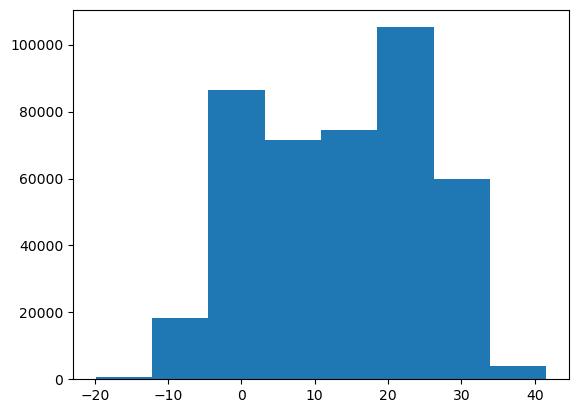

In [14]:
plt.hist(df['Temp'], bins=8)
plt.show()

In [15]:
df['Temp'].skew()

-0.10426749018365442

Pada data temperature, terlihat bahwa grafik histogram berbentuk left skewed dan tidak terdapat penyimpangan data. Data temperature ini memiliki nilai median dan mode yang lebih besar dari nilai mean

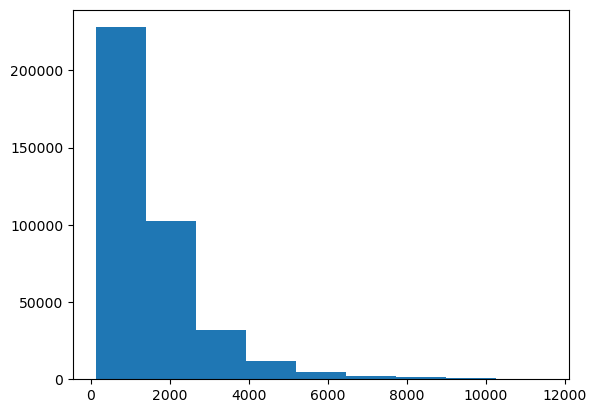

In [16]:
plt.hist(df['Total Polutan'], bins=9)
plt.show()

In [17]:
df['Total Polutan'].skew()

2.4205214384271976

Pada data total polutan, terlihat bahwa grafik histogram berbentuk right skewed dan tidak terdapat penyimpangan data. Data total polutan ini memiliki nilai mean lebih besar dari nilai median dan juga mode.

In [23]:
df_station = df.loc[df['station'] == i]
df_station_year = df_station.groupby(df_station['Date'].dt.year).mean().sort_values(['Date'], ascending = False).reset_index()

In [24]:
df_station_year

,Date,Hour,PM2.5,PM10,SO2,NO2,CO,O3,Temp,Total Polutan
0,2017,11.5,107.306916,122.819164,18.705925,64.660650,1712.764350,33.973913,0.674045,2058.493930
1,2016,11.5,78.542035,98.848973,10.673193,50.529971,1231.884562,57.286608,13.863540,1532.230281
2,2015,11.5,84.714430,110.949323,14.332866,52.757159,1355.815299,58.915989,13.564706,1679.787369
3,2014,11.5,89.077090,125.986351,22.336078,61.476662,1419.292183,56.984474,14.292637,1762.842499
4,2013,11.5,84.028276,111.313812,21.831588,56.133831,1437.839723,55.065550,15.854153,1733.015938


### Data Visualization

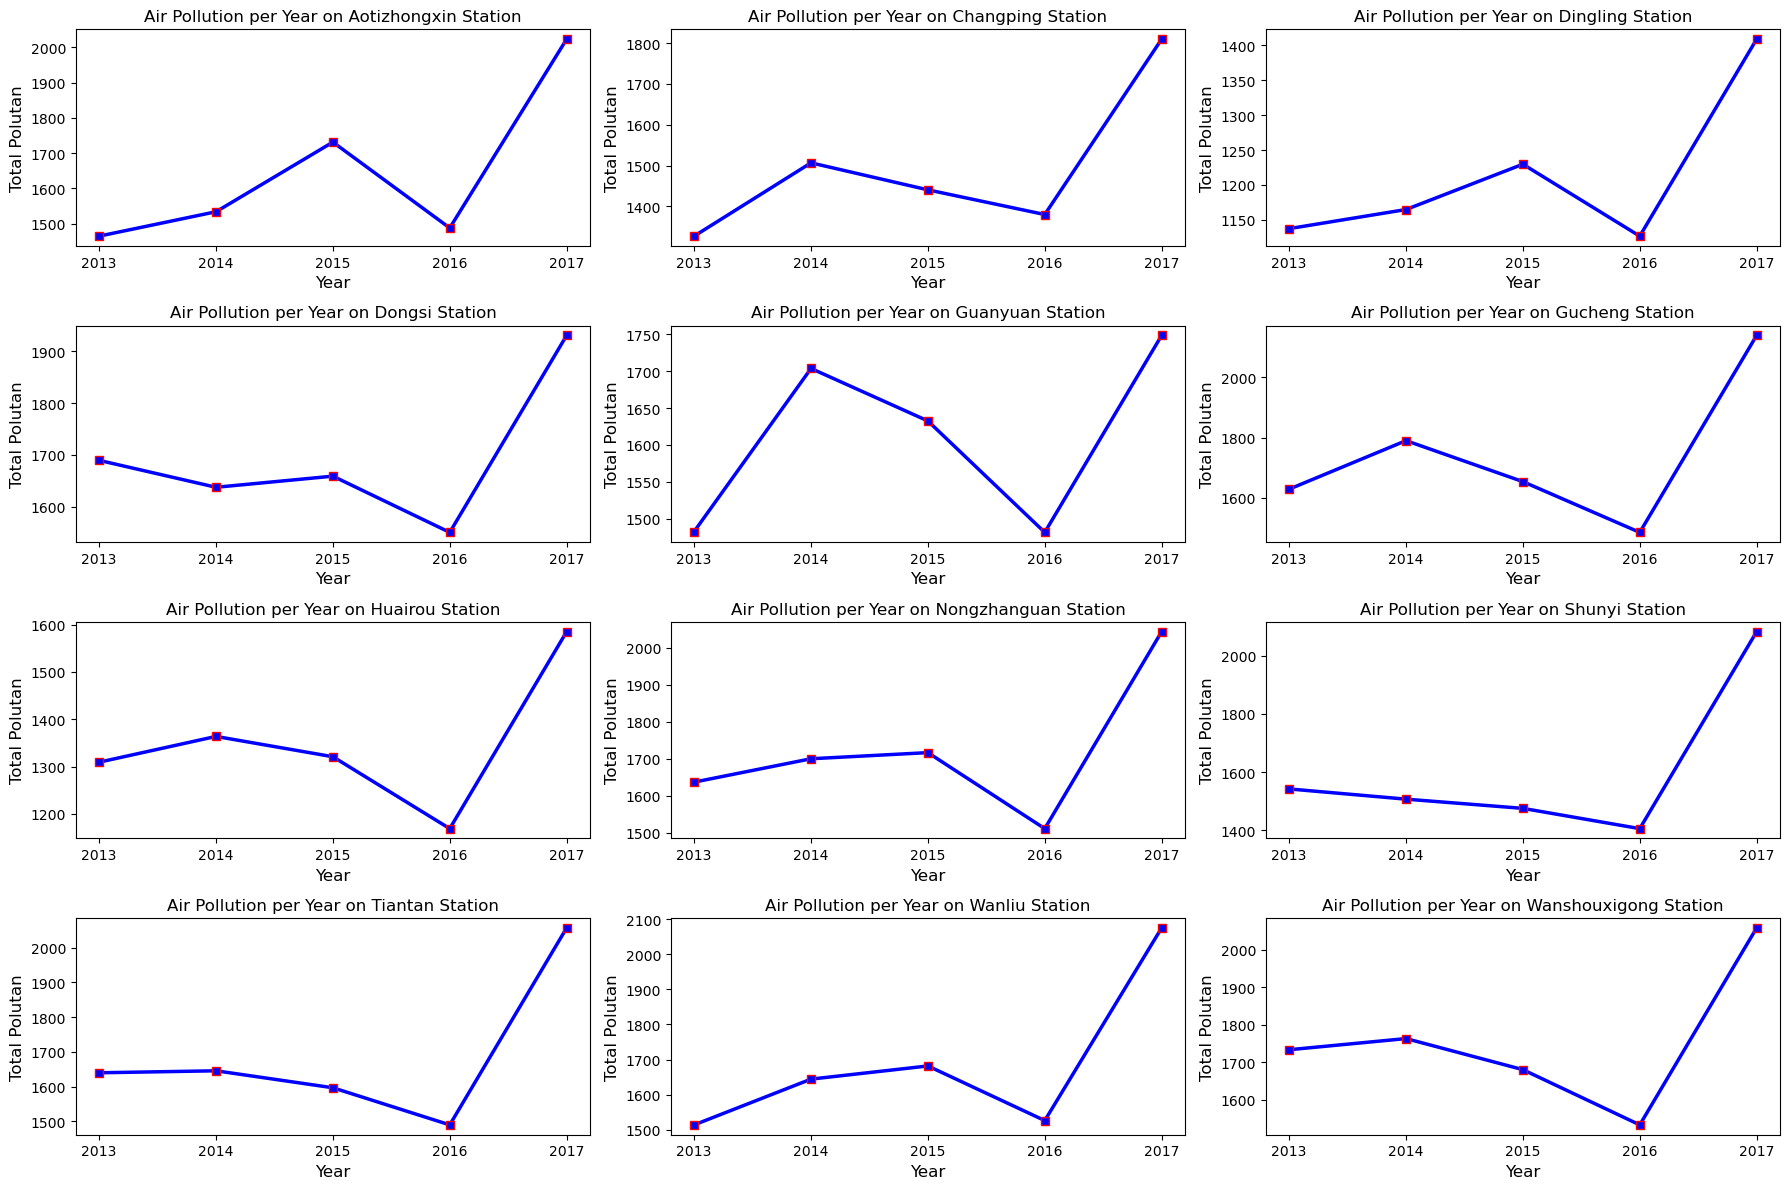

In [18]:
fig, axs = plt.subplots(4, 3, figsize=(18, 12))
j = 0
for i in list(df['station'].unique()):
    df_station = df.loc[df['station'] == i]
    df_station_year = df_station.groupby(df_station['Date'].dt.year).mean().sort_values(['Date'], ascending = False).reset_index()
    ax = axs[j // 3, j % 3]
    ax.set_title('Air Pollution per Year on ' + i + ' Station')
    ax.plot(df_station_year['Date'], 
             df_station_year['Total Polutan'], 
             color='blue',
             marker = 's',
             linewidth = 2.5,
             markerfacecolor = 'blue',
             markeredgecolor = 'red')
    ax.set_xlabel('Year',size=12)
    ax.set_ylabel('Total Polutan',size=12)
    
    ax.set_xticks(list(df_station_year['Date']))
    j += 1
    
while j < 4 * 3:
    axs[j // 3, j % 3].axis('off')
    j += 1
    
plt.tight_layout()
plt.show()

#### Terlihat bahwa polusi udara cenderung menurun pada tahun 2016 lalu meningkat pesat pada tahun 2017

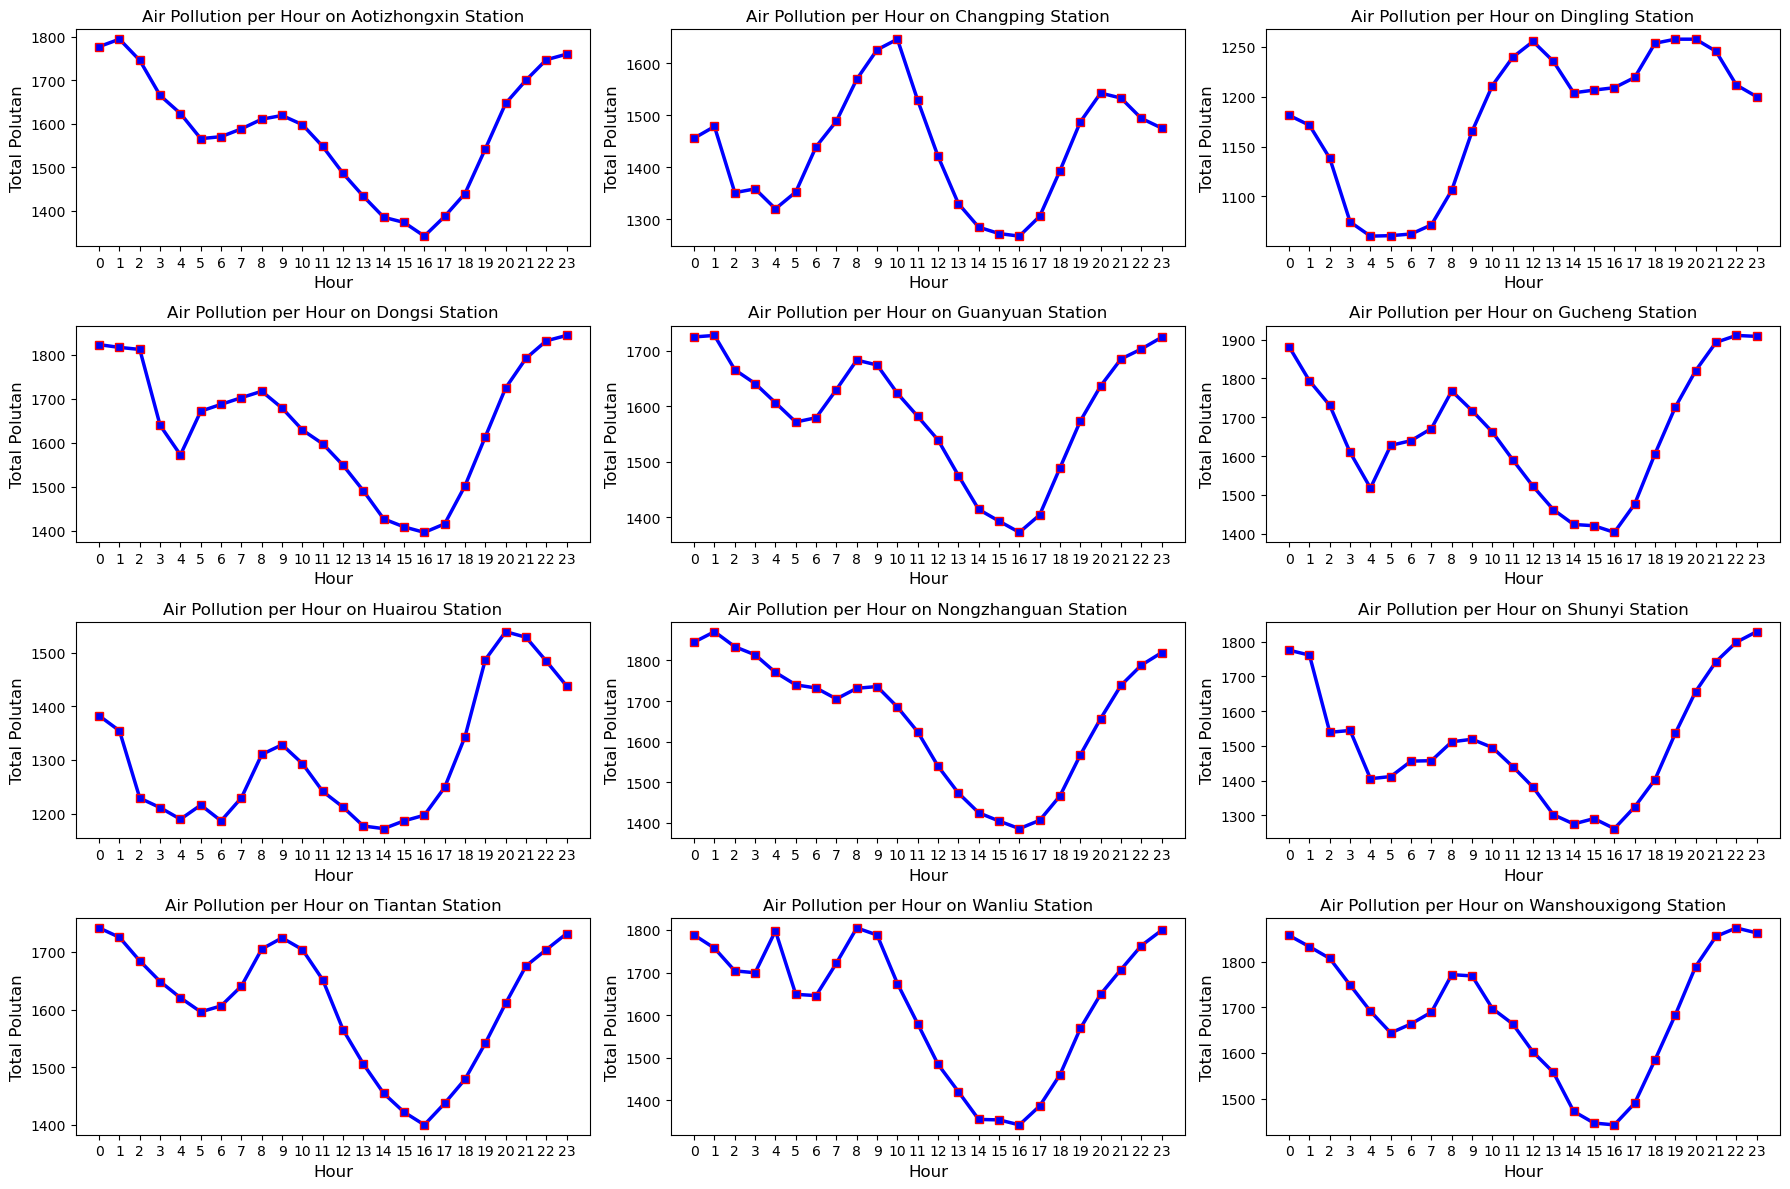

In [19]:
fig, axs = plt.subplots(4, 3, figsize=(18, 12))
j = 0
for i in list(df['station'].unique()):
    df_station = df.loc[df['station'] == i]
    df_station_hour = df_station.groupby(df_station['Hour']).mean().sort_values(['Hour'], ascending = False).reset_index()
    ax = axs[j // 3, j % 3]
    ax.set_title('Air Pollution per Hour on ' + i + ' Station')
    ax.plot(df_station_hour['Hour'], 
             df_station_hour['Total Polutan'], 
             color='blue',
             marker = 's',
             linewidth = 2.5,
             markerfacecolor = 'blue',
             markeredgecolor = 'red')
    ax.set_xlabel('Hour',size=12)
    ax.set_ylabel('Total Polutan',size=12)
    
    ax.set_xticks(list(df_station_hour['Hour']))
    j += 1
    
while j < 4 * 3:
    axs[j // 3, j % 3].axis('off')
    j += 1
    
plt.tight_layout()
plt.show()

#### Terlihat bahwa polusi meningkat dari pagi hingga siang lalu menurun pada sore hari

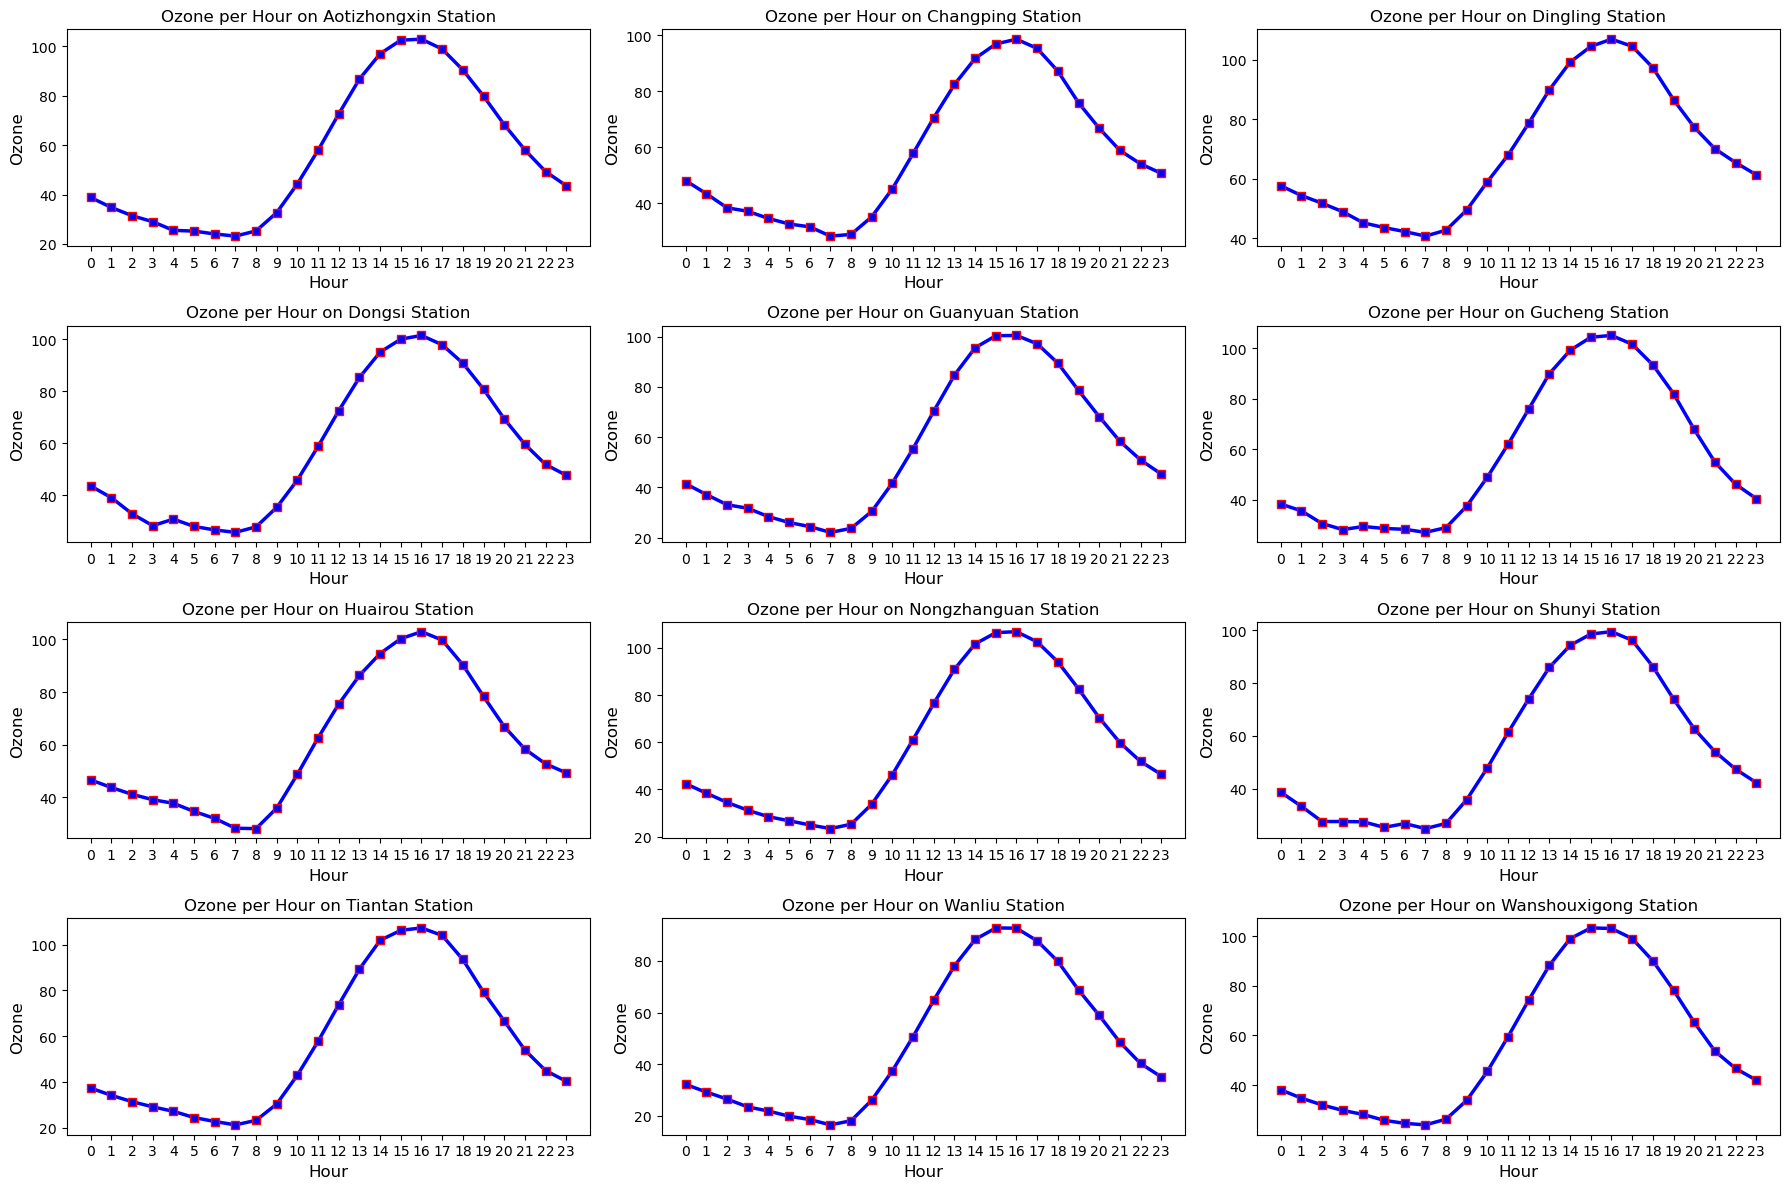

In [20]:
fig, axs = plt.subplots(4, 3, figsize=(18, 12))
j = 0
for i in list(df['station'].unique()):
    df_station = df.loc[df['station'] == i]
    df_station_hour = df_station.groupby(df_station['Hour']).mean().sort_values(['Hour'], ascending = False).reset_index()
    ax = axs[j // 3, j % 3]
    ax.set_title('Ozone per Hour on ' + i + ' Station')
    ax.plot(df_station_hour['Hour'], 
             df_station_hour['O3'], 
             color='blue',
             marker = 's',
             linewidth = 2.5,
             markerfacecolor = 'blue',
             markeredgecolor = 'red')
    ax.set_xlabel('Hour',size=12)
    ax.set_ylabel('Ozone',size=12)
    
    ax.set_xticks(list(df_station_hour['Hour']))
    j += 1
    
while j < 4 * 3:
    axs[j // 3, j % 3].axis('off')
    j += 1
    
plt.tight_layout()
plt.show()

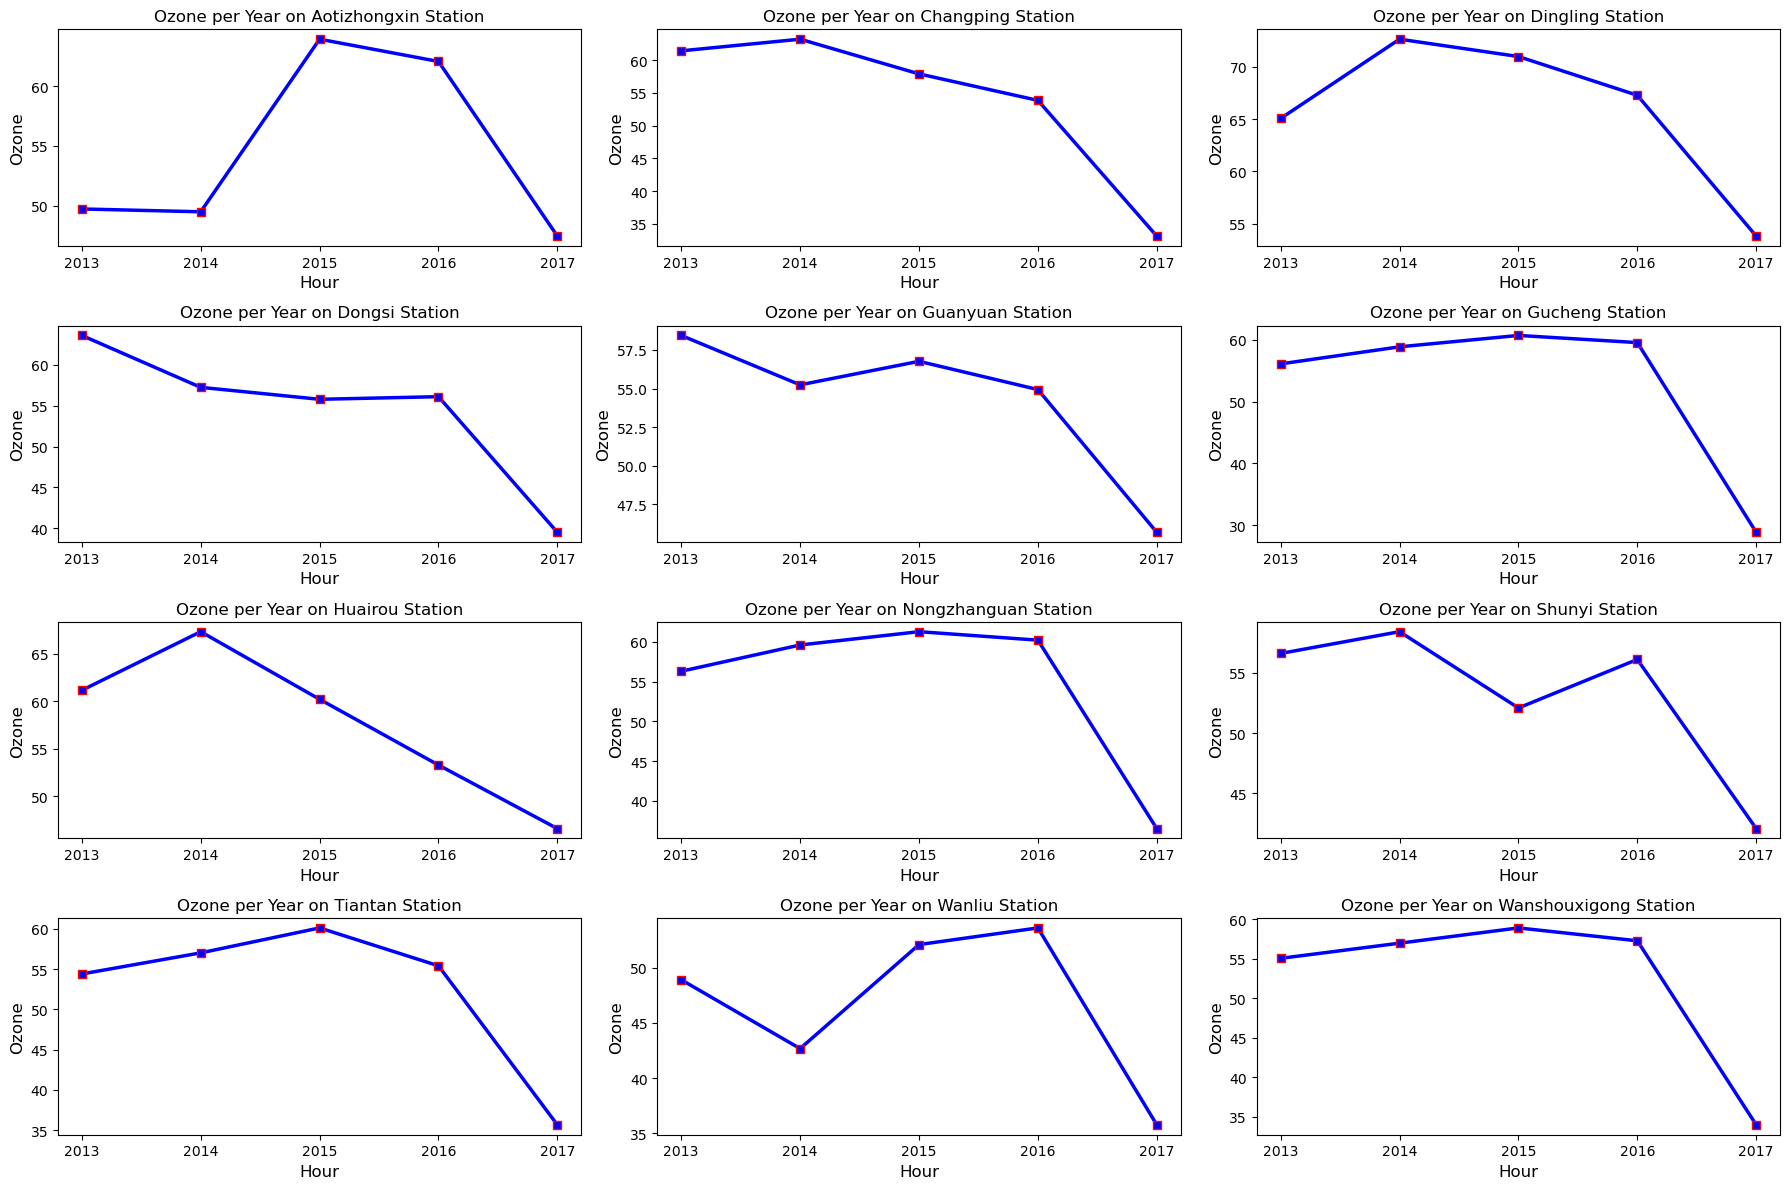

In [25]:
fig, axs = plt.subplots(4, 3, figsize=(18, 12))
j = 0
for i in list(df['station'].unique()):
    df_station = df.loc[df['station'] == i]
    df_station_year = df_station.groupby(df_station['Date'].dt.year).mean().sort_values(['Date'], ascending = False).reset_index()
    ax = axs[j // 3, j % 3]
    ax.set_title('Ozone per Year on ' + i + ' Station')
    ax.plot(df_station_year['Date'], 
             df_station_year['O3'], 
             color='blue',
             marker = 's',
             linewidth = 2.5,
             markerfacecolor = 'blue',
             markeredgecolor = 'red')
    ax.set_xlabel('Hour',size=12)
    ax.set_ylabel('Ozone',size=12)
    
    ax.set_xticks(list(df_station_year['Date']))
    j += 1
    
while j < 4 * 3:
    axs[j // 3, j % 3].axis('off')
    j += 1
    
plt.tight_layout()
plt.show()

#### Terlihat bahwa rata-rata Ozone cenderung meningkat pada tahun 2015 lalu menurun pada tahun 2017

Text(0.5, 1.0, 'Pollution Mean on Every Station in Beijing')

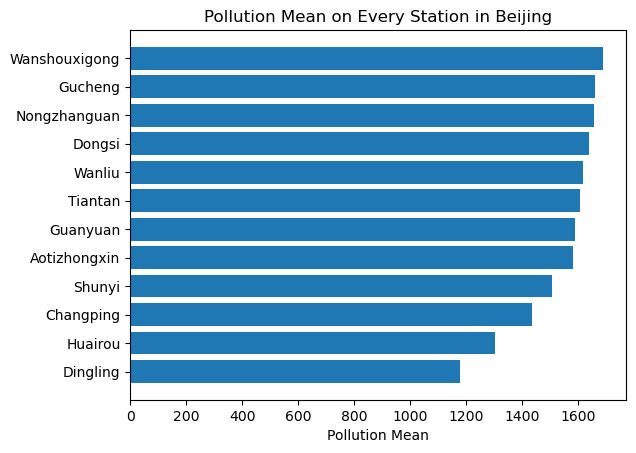

In [26]:
df_polutan_mean = df.groupby('station').mean()['Total Polutan'].reset_index().sort_values(['Total Polutan'], ascending = False)

labels = list(df_polutan_mean['station'])
value = list(df_polutan_mean['Total Polutan'])
y_pos = np.arange(len(labels))

fig, ax = plt.subplots()

ax.barh(y_pos, value, align='center')
ax.set_yticks(y_pos, labels=labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Pollution Mean')
ax.set_title('Pollution Mean on Every Station in Beijing')
